In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

In [212]:
df =  pd.read_csv("/home/jerome/Documents/CSV FILE/loan data.csv")

In [213]:
df

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,LP001256,Male,No,3750.0,176.0,N
1,LP001404,Female,Yes,3167.0,154.0,Y
2,LP001370,Male,No,7333.0,120.0,N
3,LP002435,Male,Yes,3539.0,55.0,N
4,LP001877,Male,Yes,4708.0,NaN,Y
...,...,...,...,...,...,...
9995,LP002467,Male,Yes,3708.0,173.0,N
9996,LP001630,Male,No,2333.0,102.0,N
9997,LP002053,Male,Yes,4342.0,NaN,Y
9998,LP001990,Male,No,2000.0,NaN,N


In [214]:
df.duplicated().sum()

np.int64(8696)

In [215]:
df = df.drop_duplicates()

In [216]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
ApplicantIncome    369
LoanAmount         400
Loan_Status          0
dtype: int64

In [217]:
df = df.dropna()

In [218]:
df =  df.drop("Loan_ID", axis = 1)

In [219]:
df

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,Male,No,3750.0,176.0,N
1,Female,Yes,3167.0,154.0,Y
2,Male,No,7333.0,120.0,N
3,Male,Yes,3539.0,55.0,N
5,Male,No,3062.0,111.0,N
...,...,...,...,...,...
2794,Male,No,2479.0,59.0,Y
2809,Male,Yes,2889.0,45.0,N
3094,Male,Yes,4695.0,96.0,Y
3221,Male,Yes,5116.0,165.0,N


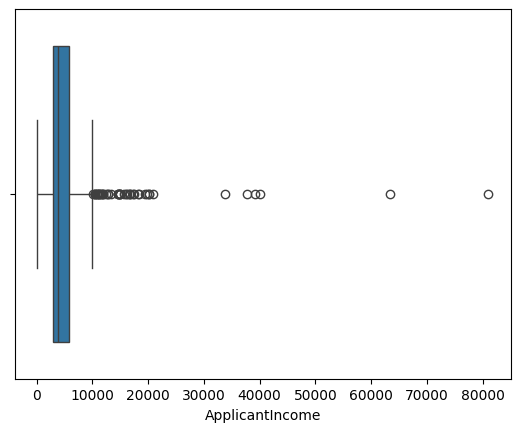

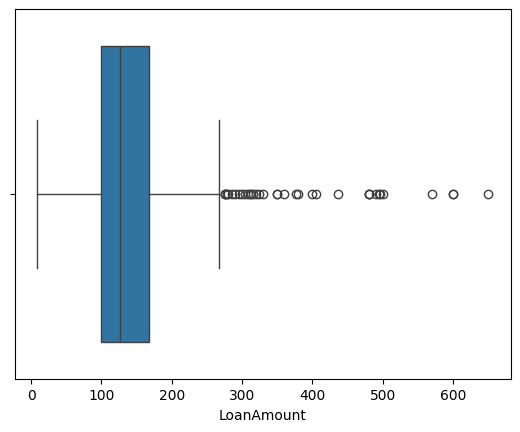

In [220]:
num = df.select_dtypes("number")
cat = df.select_dtypes("object")
for x in num.columns:
    sns.boxplot(x = num[x])
    plt.show()

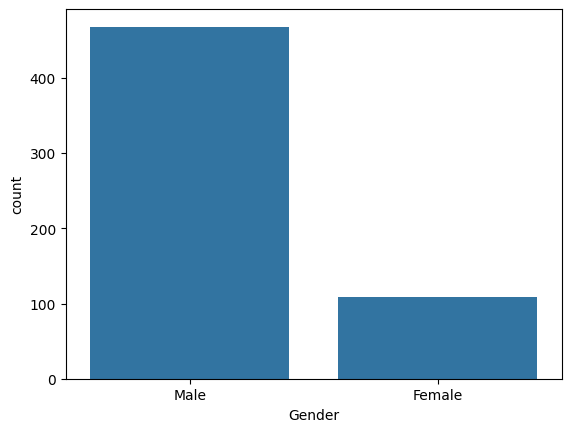

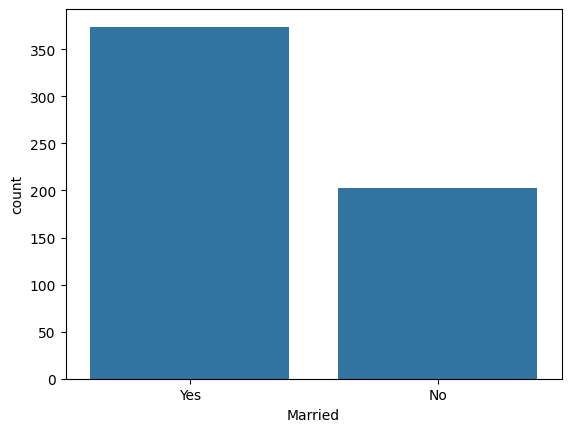

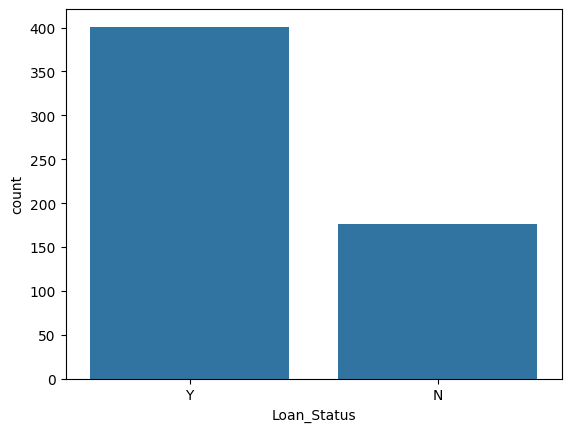

In [221]:
for y in cat.columns:
    sns.barplot(cat[y].value_counts())
    plt.show()

In [222]:
le = LabelEncoder()
for y in cat:
    df[y] = le.fit_transform(df[y])

In [223]:
X =  df.drop(columns="Loan_Status")
y = df["Loan_Status"]

In [224]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 45, stratify= y)

In [225]:
param_grid = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [5,10,15]
}
model = DecisionTreeClassifier(random_state= 45)

grid_search = GridSearchCV(estimator=model, param_grid= param_grid, cv = 5)
grid_search.fit(X_train,y_train)
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.6770219728845255
DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5,
                       random_state=45)


In [226]:
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.35      0.31      0.33        35
           1       0.72      0.75      0.73        81

    accuracy                           0.62       116
   macro avg       0.54      0.53      0.53       116
weighted avg       0.61      0.62      0.61       116



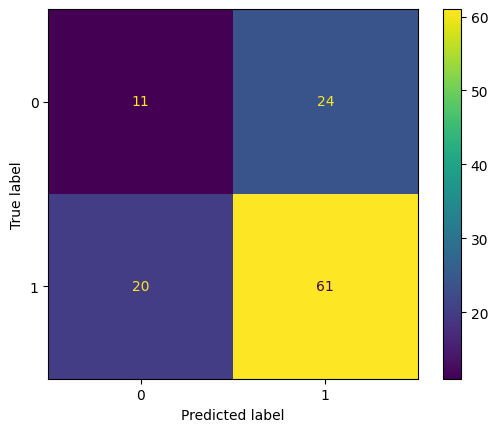

In [229]:
CM = metrics.confusion_matrix(y_test,pred,labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = CM,display_labels = model.classes_)
disp.plot()

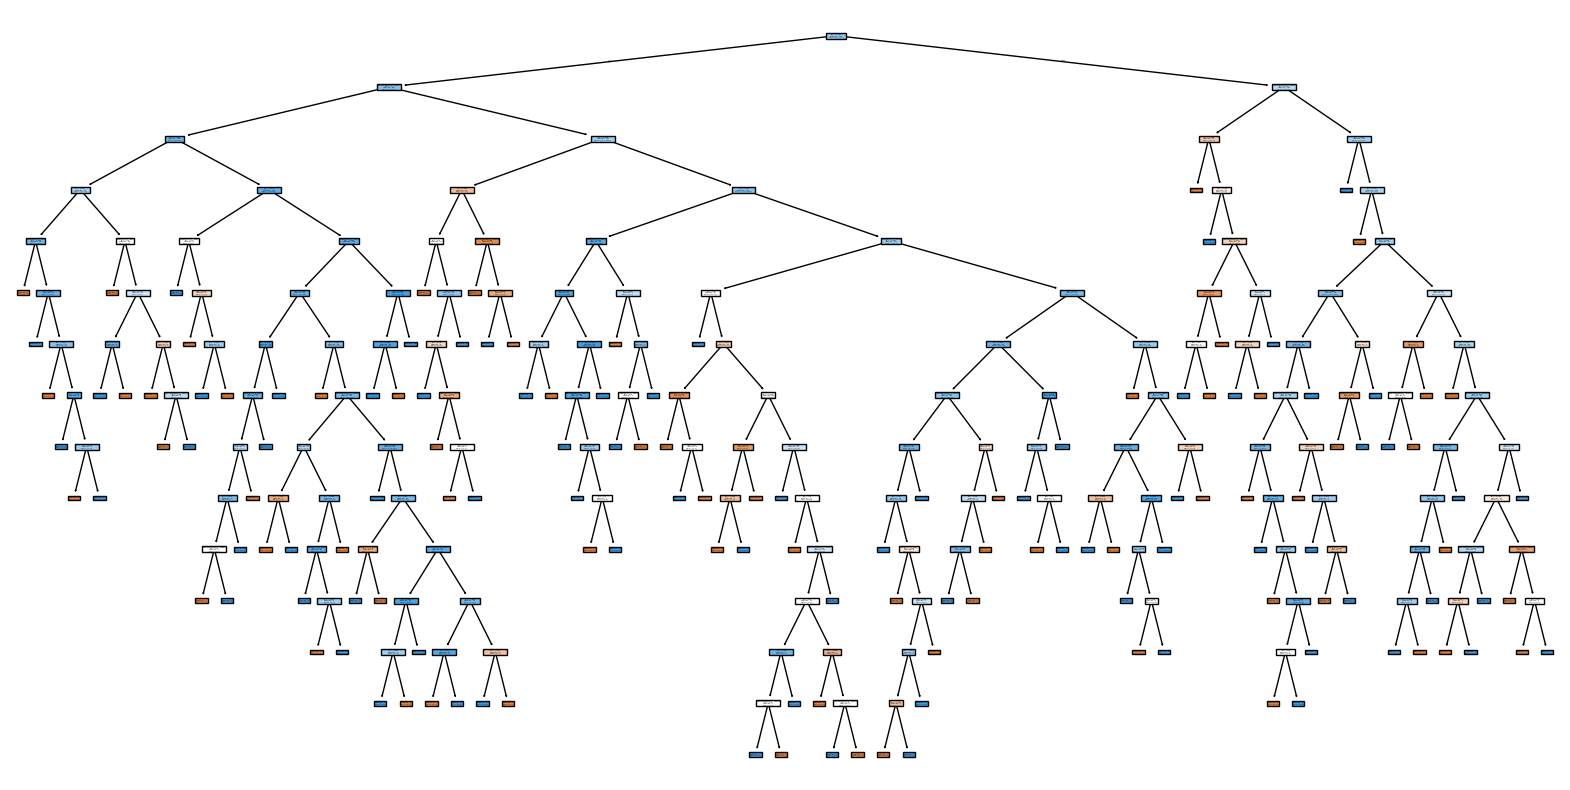

In [231]:
plt.figure(figsize= (20,10))
plot_tree(model,feature_names = X.columns, filled = True)
plt.show()